## Q2 LDA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
def print_latex(mat):
    s = r'\begin{bmatrix}' + '\n'
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            if j != mat.shape[1] - 1:
                s += '{: .4f} & '.format(mat[i,j])
            else:
                s += '{: .4f} \\\\\n'.format(mat[i,j])
    s += r'\end{bmatrix}'
    print(s)

(2, 100) (2, 100)


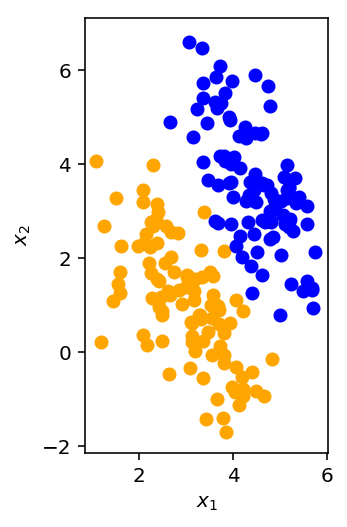

In [3]:
# Load the data and visualize.
Xs = np.load('lda.npy')

X_0 = np.matrix(Xs[:, 0:2]).T  # Shape: (2, 100).
X_1 = np.matrix(Xs[:, 2:4]).T  # Shape: (2, 100).

print(X_0.shape, X_1.shape)
plt.scatter(X_0[0].tolist(), X_0[1].tolist(), color='orange')
plt.scatter(X_1[0].tolist(), X_1[1].tolist(), color='blue')
plt.axis('scaled')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [4]:
# (a) Compute mean of each class.
import numpy as np
mu_0 = []
mu_0.append([np.mean(X_0[0].tolist())])
mu_0.append([np.mean(X_0[1].tolist())])
mu_0 = np.matrix(mu_0)
mu_1 = []
mu_1.append([np.mean(X_1[0].tolist())])
mu_1.append([np.mean(X_1[1].tolist())])
mu_1 = np.matrix(mu_1)
print(mu_0.shape, mu_1.shape)
print('mu_0=\n{},\nmu_1=\n{}'.format(mu_0, mu_1))

(2, 1) (2, 1)
mu_0=
[[ 2.98351552]
 [ 1.06453902]],
mu_1=
[[ 4.46952033]
 [ 3.52885988]]


In [5]:
# calculate the between class covariance:
N = X_0.shape[1]
Z = []
mean0 = np.matrix.item(mu_0[1])
x0 = Xs[:, 0:2]
for c in range(N):
    Z.append(x0[c][1] - mean0)
Z = np.matrix(Z)
Z

matrix([[ 0.38507891, -0.84573494,  1.19875092,  0.64406014,  2.12038746,
          1.18471009,  0.01967204,  2.37606288, -0.69699842, -0.910081  ,
          1.1618925 ,  1.26354341,  0.82331055,  2.20356411, -1.54304042,
          0.19524756, -1.04017726,  1.61348847, -0.83414558,  1.25187084,
         -0.18957861,  0.24187518,  1.92143942,  2.07863428, -0.09993144,
          0.10794002, -0.63425032, -0.27178387, -0.27109372,  0.63414954,
          0.01625095,  0.52527373,  0.09369634, -0.05350456,  1.62187185,
          0.49250499,  1.44861432,  0.60702016,  3.00725033, -0.06425938,
          0.13947225,  0.45390188,  0.95005478,  0.31472264,  0.25051241,
          1.70423942,  0.22541269,  1.61025004, -0.44513094,  0.83398507,
         -0.2864186 , -2.06766738, -1.62784837, -1.91865412, -1.40886278,
          2.90608316,  1.76865974,  1.92144226, -0.71511725, -2.47391796,
         -0.93736276,  0.57311989, -0.41807625,  0.14745105, -0.85237672,
         -2.00330051, -0.03769642, -0.

In [6]:
N =  X_0.shape[1]
#Z = X-repmat(mean(X,2), [1,N])
Z = []
mean0 = np.matrix.item(mu_0[1])
x0 = Xs[:, 0:2]
for c in range(N):
    Z.append(x0[c][1] - mean0)
Z = np.matrix(Z)
print(Z.shape)
# CV = 1/N *Z *Z
Sigma_0 = 1/N * Z.T * Z

print(Sigma_0.shape)

(1, 100)
(100, 100)


In [7]:
# (b) Compute the covariance matrix for each class, Sigma_0 and Sigma_1.
Sigma_0 = 0
Sigma_1 = 0

# using slide 15 in lecture 10 as reference 
#N = size(X,2) --> second dimension in the array ie 100
N =  X_0.shape[1]
#Z = X-repmat(mean(X,2), [1,N])
Z = []
mean0 = np.matrix.item(mu_0[1])
x0 = Xs[:, 0:2]
for c in range(N):
    Z.append(x0[c][1] - mean0)
Z = np.matrix(Z)
print(Z.shape)
# CV = 1/N *Z *Z
Sigma_0 = 1/N * Z.T * Z 
print(Sigma_0)

# using slide 15 in lecture 10 as reference 
#N = size(X,2) --> second dimension in the array ie 100
N =  X_1.shape[1]
#Z = X-repmat(mean(X,2), [1,N])
Z2 = []
mean1 = np.matrix.item(mu_1[1])
x1 = Xs[:, 2:4]
for c in range(N):
    Z2.append(x1[c][1] - mean1)
Z2 = np.matrix(Z2)
print(Z2.shape)
# CV = 1/N *Z *Z.T
Sigma_1 = 1/N * Z2.T * Z2 
print(Sigma_1)

(1, 100)
[[ 0.00148286 -0.00325675  0.00461614 ..., -0.00078311 -0.00502944
  -0.00571352]
 [-0.00325675  0.00715268 -0.01013826 ...,  0.00171992  0.01104599
   0.0125484 ]
 [ 0.00461614 -0.01013826  0.01437004 ..., -0.00243782 -0.01565666
  -0.01778619]
 ..., 
 [-0.00078311  0.00171992 -0.00243782 ...,  0.00041357  0.00265609
   0.00301736]
 [-0.00502944  0.01104599 -0.01565666 ...,  0.00265609  0.01705849
   0.01937869]
 [-0.00571352  0.0125484  -0.01778619 ...,  0.00301736  0.01937869
   0.02201447]]
(1, 100)
[[ 0.02790802  0.01739309  0.00219051 ..., -0.03731426 -0.00379736
  -0.04564131]
 [ 0.01739309  0.01083988  0.00136519 ..., -0.02325533 -0.00236663
  -0.02844499]
 [ 0.00219051  0.00136519  0.00017193 ..., -0.00292881 -0.00029806
  -0.0035824 ]
 ..., 
 [-0.03731426 -0.02325533 -0.00292881 ...,  0.04989083  0.00507724
   0.06102446]
 [-0.00379736 -0.00236663 -0.00029806 ...,  0.00507724  0.0005167
   0.00621028]
 [-0.04564131 -0.02844499 -0.0035824  ...,  0.06102446  0.00621028

In [8]:
# w* = (Sigma_0 + Sigma_1)^-1 (mu_0[1] mu_1[1])
SigmaD =Sigma_0 + Sigma_1
meanD = (np.matrix.item(mu_0[1]) - np.matrix.item(mu_1[1]))
w_star = SigmaD**-1 * meanD
w_star

matrix([[  5.96374404e+16,   2.35899679e+17,   3.04159027e+17, ...,
           9.02709882e+16,  -8.96454080e+17,   2.73970903e+17],
        [ -1.03335040e+17,  -6.81471252e+16,  -8.75962489e+16, ...,
           1.80560323e+16,   1.39541510e+16,  -4.49571050e+16],
        [  1.71437474e+17,   8.42130187e+17,   3.11211604e+17, ...,
          -4.63832300e+16,  -1.12952435e+18,   6.92715021e+17],
        ..., 
        [ -8.29884951e+16,  -1.46936198e+17,   1.76291814e+17, ...,
           5.70473399e+16,  -2.85113745e+17,  -1.08448771e+17],
        [ -2.82902592e+17,  -4.43938572e+17,   1.53194720e+17, ...,
           7.41727516e+16,  -4.55531594e+17,  -1.99602372e+17],
        [  8.27625250e+16,   1.96246020e+17,  -3.97526643e+16, ...,
          -4.89920562e+16,  -1.00039937e+16,   1.43563708e+17]])

In [9]:
w_tilde_star = w_star / np.linalg.norm(w_star,2)
w_tilde_star

matrix([[  3.76679412e-04,   1.48997932e-03,   1.92111604e-03, ...,
           5.70165697e-04,  -5.66214434e-03,   1.73044313e-03],
        [ -6.52680291e-04,  -4.30427914e-04,  -5.53271625e-04, ...,
           1.14044727e-04,   8.81366029e-05,  -2.83956115e-04],
        [  1.08282593e-03,   5.31902613e-03,   1.96566122e-03, ...,
          -2.92963744e-04,  -7.13425264e-03,   4.37529654e-03],
        ..., 
        [ -5.24168330e-04,  -9.28072035e-04,   1.11348670e-03, ...,
           3.60319932e-04,  -1.80082306e-03,  -6.84979423e-04],
        [ -1.78685707e-03,  -2.80398553e-03,   9.67601842e-04, ...,
           4.68486714e-04,  -2.87720888e-03,  -1.26071984e-03],
        [  5.22741068e-04,   1.23952059e-03,  -2.51084052e-04, ...,
          -3.09441499e-04,  -6.31867905e-05,   9.06770861e-04]])

In [10]:
# (c) Find the optimal w_star and w_tilde_star with unit length.
print(w_star.shape, w_tilde_star.shape)
print('w_star=\n{},\nw_tilde_star=\n{}'.format(w_star, w_tilde_star))

(100, 100) (100, 100)
w_star=
[[  5.96374404e+16   2.35899679e+17   3.04159027e+17 ...,   9.02709882e+16
   -8.96454080e+17   2.73970903e+17]
 [ -1.03335040e+17  -6.81471252e+16  -8.75962489e+16 ...,   1.80560323e+16
    1.39541510e+16  -4.49571050e+16]
 [  1.71437474e+17   8.42130187e+17   3.11211604e+17 ...,  -4.63832300e+16
   -1.12952435e+18   6.92715021e+17]
 ..., 
 [ -8.29884951e+16  -1.46936198e+17   1.76291814e+17 ...,   5.70473399e+16
   -2.85113745e+17  -1.08448771e+17]
 [ -2.82902592e+17  -4.43938572e+17   1.53194720e+17 ...,   7.41727516e+16
   -4.55531594e+17  -1.99602372e+17]
 [  8.27625250e+16   1.96246020e+17  -3.97526643e+16 ...,  -4.89920562e+16
   -1.00039937e+16   1.43563708e+17]],
w_tilde_star=
[[  3.76679412e-04   1.48997932e-03   1.92111604e-03 ...,   5.70165697e-04
   -5.66214434e-03   1.73044313e-03]
 [ -6.52680291e-04  -4.30427914e-04  -5.53271625e-04 ...,   1.14044727e-04
    8.81366029e-05  -2.83956115e-04]
 [  1.08282593e-03   5.31902613e-03   1.96566122e-0

The given formula only tells you conceptually how to compute the projection of x, you need to figure out how to arrange the matrix to output the correct shape.
One hint though, try to put w_tilde_star at the beginning of the formula.

In [11]:
#Get the data point x (x1, x2)^T
x0 = Xs[:, 0:2]
l = []
for i in range(100):
    first = (x0[i][0],x0[i][1])
    l.append(first)


firstM = np.matrix(l)
firstM.shape
#w_tilde_star.T.dot(x).dot(w_tilde_star)

(100, 2)

In [12]:
Xproj_0 = w_tilde_star.dot(firstM)
Xproj_0 = Xproj_0.T.dot(w_tilde_star)
Xproj_0.shape

(2, 100)

In [13]:
#Get the data point x (x1, x2)^T
x1 = Xs[:, 2:4]
l1 = []
for i in range(100):
    first = (x1[i][0],x1[i][1])
    l1.append(first)


firstM1 = np.matrix(l1)
firstM1.shape
#w_tilde_star.T.dot(x).dot(w_tilde_star)

(100, 2)

In [14]:
Xproj_1 = w_tilde_star.dot(firstM1)
Xproj_1 = Xproj_1.T.dot(w_tilde_star)
Xproj_1.shape

(2, 100)

(2, 100) (2, 100)


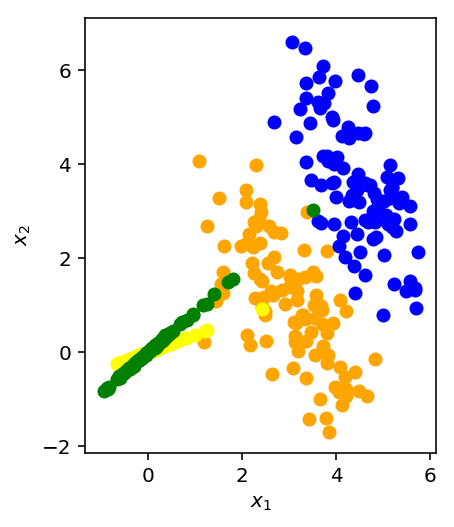

In [15]:
# (d) Compute the projection and plot the figure.

print(Xproj_0.shape, Xproj_1.shape)
plt.scatter(X_0[0].tolist(), X_0[1].tolist(), color='orange')
plt.scatter(X_1[0].tolist(), X_1[1].tolist(), color='blue')
plt.scatter(Xproj_0[0].tolist(), Xproj_0[1].tolist(), color='yellow')
plt.scatter(Xproj_1[0].tolist(), Xproj_1[1].tolist(), color='green')
plt.axis('scaled')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [16]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import GridSearchCV
%config InlineBackend.figure_format = 'retina'

## Q5 Linear SVM

In [17]:
# 1) Load data.
from sklearn.utils import shuffle
X_and_Y = np.load('arrhythmia.npy')   # Load data from file.
X_and_Y = shuffle(X_and_Y)   # Shuffle the data.
X = np.matrix(X_and_Y[:,0:X_and_Y.shape[1] -1])    # First column to second last column: Features (numerical values) 
Y = np.matrix(X_and_Y[:,X_and_Y.shape[1] -1:])    # Last column: Labels (0 or 1)
print(X.shape, Y.shape)       # Check the shapes.

(452, 279) (452, 1)


In [31]:
# 2) Split the dataset into 2 parts: 
#    (a) Training set + Validation set  (80% of all data points)
#    (b) Test set                       (20% of all data points)



X_train_val = np.matrix(X[0:X.shape[0]*0.8 , :]) # Get features from train + val set.
X_test      = np.matrix(X[X.shape[0]*0.8: , :])# Get features from test set.     
Y_train_val = np.matrix(Y[0:Y.shape[0]*0.8 , :]) # Get labels from train + val set.
Y_test      = np.matrix(Y[Y.shape[0]*0.8: , :]) # Get labels from test set.  
print(X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape)

(361, 279) (91, 279) (361, 1) (91, 1)


/anaconda/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py:318: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  out = N.ndarray.__getitem__(self, index)


In [32]:
# 3) Consider linear kernel. Perform grid search for best C 
#    with 3-fold cross-validation. You can use svm.SVC() for SVM
#    classifier and use GridSearchCV() to perform such grid search.
#    For more details, please refer to the sklearn documents:
#         http://scikit-learn.org/stable/modules/svm.html
#         http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

classifier = svm.SVC(gamma="scale",kernel='linear')
C_list     = [10**-5,10**-4,10**-3, 10**-2, 10** -1] # Different C to try. from hint 2
parameters = {'kernel':('linear', 'rbf'), 'C':C_list}
clf = GridSearchCV(classifier, parameters, cv=3)
clf.fit(X_train, y_train)
#__________________
#__________________

IndexError: too many indices for array

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(361, 279) (91, 279) (361, 1) (91, 1)


In [ ]:
# 4) Draw heatmaps for result of grid search and find 
#    best C for validation set.

def draw_heatmap_linear(acc, acc_desc, C_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=C_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$C$')
    plt.title(acc_desc + ' w.r.t $C$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()
    
#
# You can use the draw_heatmap_linear() to draw a heatmap to visualize 
# the accuracy w.r.t. C and gamma. Some demo code is given below as hint:
#
# demo_acc        = np.array([[0.8],
#                             [0.7]])
# demo_C_list     = [0.1, 1]
# draw_heatmap_linear(demo_acc, 'demo accuracy', demo_C_list)
#

train_acc = 
draw_heatmap_linear(train_acc, 'train accuracy', C_list)

#val_acc = 
#draw_heatmap_linear(val_acc, 'val accuracy', C_list)

In [33]:
# 5) Use the best C to calculate the test accuracy.

test_acc = __________________
print(test_acc)

NameError: name '__________________' is not defined